In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mfaisalqureshi_hr_analytics_and_job_prediction_path = kagglehub.dataset_download('mfaisalqureshi/hr-analytics-and-job-prediction')

print('Data source import complete.')


# Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

# Plan Stage
### Questions to look into:
* Who are your stakeholders for this project?
* What are you trying to solve or accomplish?
* What are your initial observations when you explore the data?
* What resources do you find yourself using as you complete this stage?
* Do you have any ethical considerations in this stage?

## Step 1. Imports
* Import packages
* Load dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [ ]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

In [ ]:
df = pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration
* Understand your variables
* Clean your dataset (missing data, redundant data, outliers)

#### Gather basic information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Insights
* Most values are numeric except for 2, Dept and Salary

#### Gather descriptive statistics about the data

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Rename columns
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.rename(columns={
    'Work_accident':'work_accident',
    'promotion_last_5years':'promotion_last_5_years',
    'Department': 'department'
})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### Check missing values
Check for any missing values in the data.

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

#### Insights
* There are no missing values in this dataset

#### Check duplicates
Check for any duplicate entries in the data.

In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127            

In [ ]:
print("Total shape of duplicate rows, ", duplicate_rows.shape[0])

Total shape of duplicate rows,  3008


#### Insights
* There are a fair number of duplicates, best suited to drop

In [ ]:
df1 = df.drop_duplicates()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Check outliers
Check for outliers in the data.

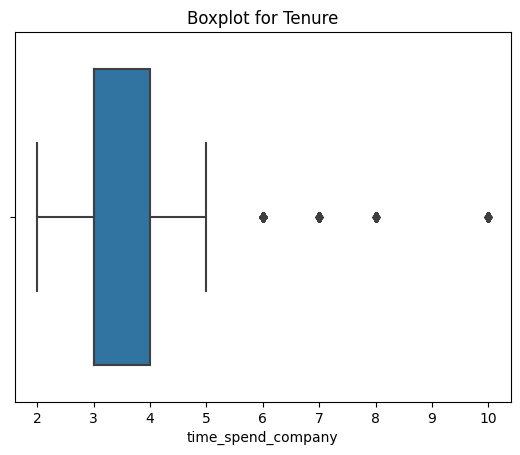

In [ ]:
sns.boxplot(x = df1['time_spend_company'])
plt.title('Boxplot for Tenure')
plt.show()

Dropping outliers

In [ ]:
Q1 = df['time_spend_company'].quantile(0.25)
Q2 = df['time_spend_company'].quantile(0.75)
IQR = Q2 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

outliers = df[(df['time_spend_company'] < lower_bound) | (df['time_spend_company'] > upper_bound)]

print(f"Number of rows containing outliers in Tenure: ", outliers.shape[0])

Number of rows containing outliers in Tenure:  1282


# Analyze Stage
* Perform EDA (analyze relationships between variables)

### Questions to consider
* What did you observe about the relationships between variables?
* What do you observe about the distributions in the data?
* What transformations did you make with your data? Why did you chose to make those decisions?
* What are some purposes of EDA before constructing a predictive model?
* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
* Do you have any ethical considerations in this stage?

### Step 2. Data Exploration
* Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [ ]:
(df1['left'].value_counts(normalize=True) * 100).round(2)

left
0    83.4
1    16.6
Name: proportion, dtype: float64

#### Insights
* There exists a clear imbalance, thus even if the model guesses all targets to be 0, model will show to have 84% accuracy

### Data visualizations
Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Converting categorical variables to numeric ones

Using get_dummies() for salary

In [ ]:
df1['salary'].value_counts()
salary_dummies = pd.get_dummies(df1['salary'], prefix = 'salary', drop_first = True)
df1 = df1.drop(columns = ['salary'])
df1 = pd.concat([df1, salary_dummies], axis = 1)

In [ ]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary_low                  bool
salary_medium               bool
dtype: object

Evaluating Department

In [ ]:
#df1['Department'].value_counts()
dept_dummies= pd.get_dummies(df1['Department'], prefix = 'dept', drop_first = False)
df1 = df1.drop(columns = ['Department'])
df1 = pd.concat([df1, dept_dummies], axis = 1)

In [ ]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_low', 'salary_medium', 'dept_IT',
       'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management',
       'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support',
       'dept_technical'],
      dtype='object')

#### Correlation Matrix

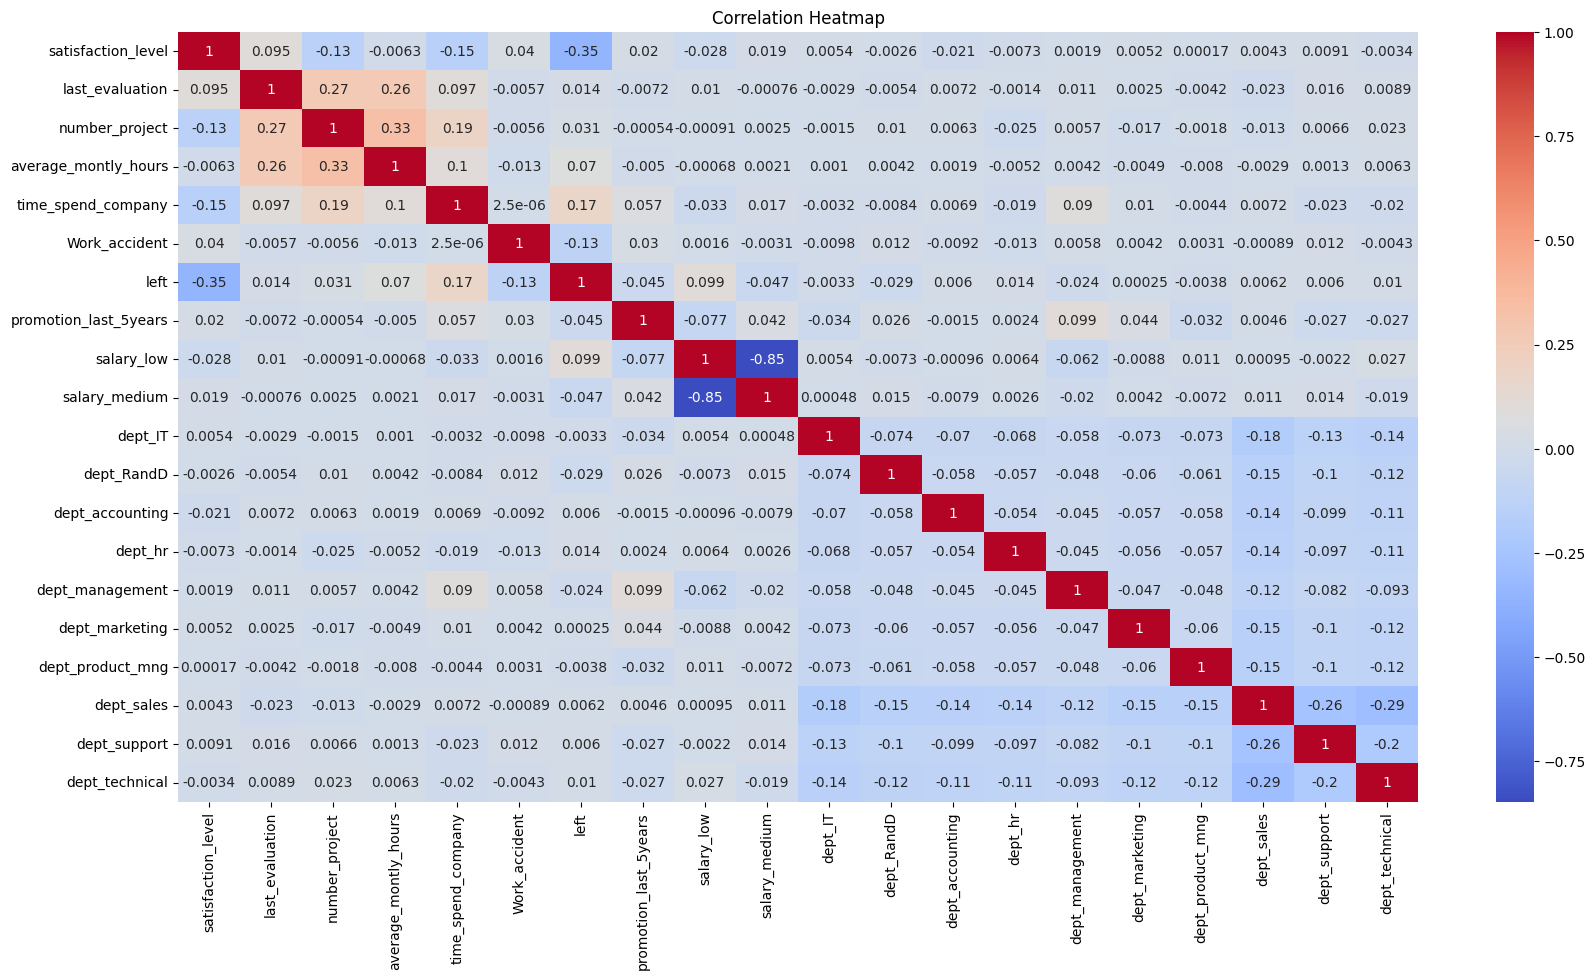

In [ ]:
plt.figure(figsize = (20, 10))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df1 = df1.drop(columns = ['last_evaluation', 'number_project'])

#### Class Distribution Bar Plot

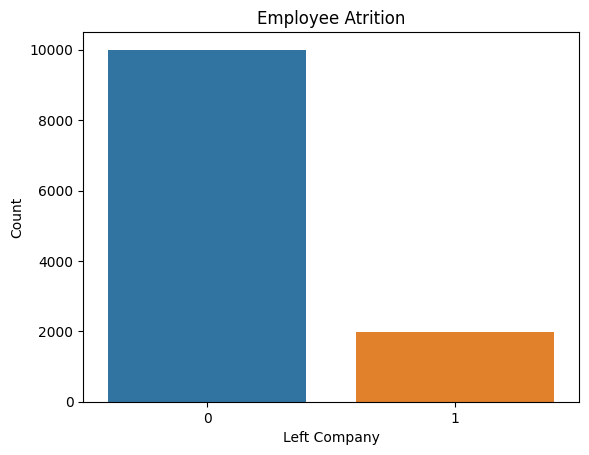

In [ ]:
sns.countplot(x = 'left', data = df1)
plt.title("Employee Atrition")
plt.xlabel("Left Company")
plt.ylabel("Count")
plt.show()

#### Boxplot: Satisfaction vs. Attrition

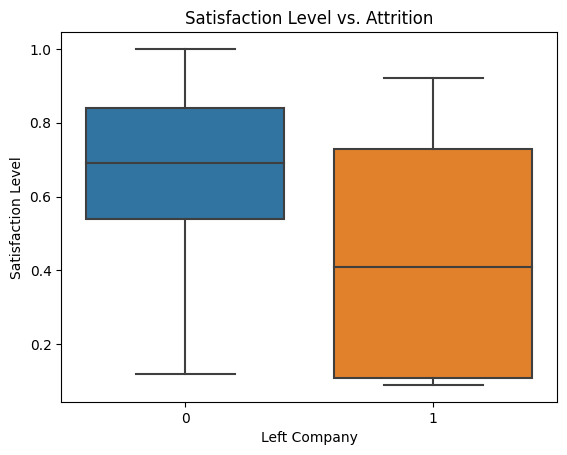

In [ ]:
sns.boxplot(x = 'left', y = 'satisfaction_level', data = df1)
plt.title("Satisfaction Level vs. Attrition")
plt.xlabel("Left Company")
plt.ylabel("Satisfaction Level")
plt.show()

#### KDE for Monthly Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


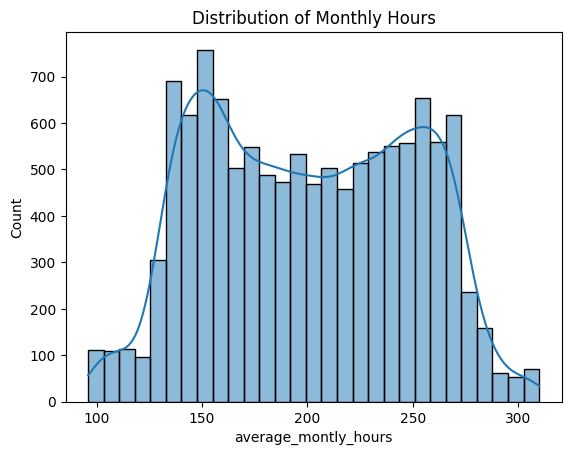

In [ ]:
sns.histplot(df1['average_montly_hours'], kde = True)
plt.title("Distribution of Monthly Hours")
plt.show()

#### Department vs Attrition

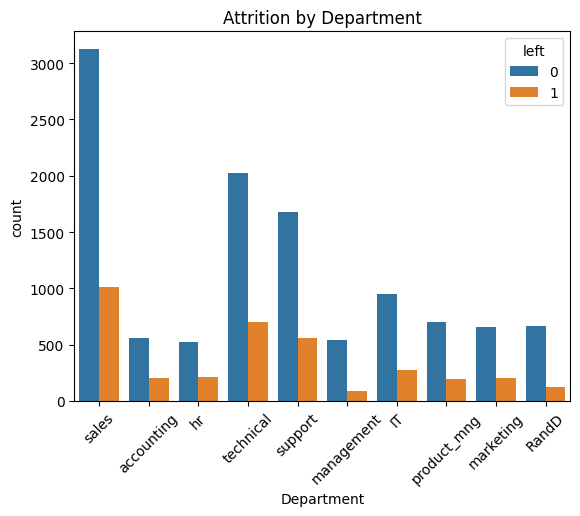

In [ ]:
sns.countplot(x = 'Department', hue = 'left', data = df)
plt.xticks(rotation = 45)
plt.title("Attrition by Department")
plt.show()

#### Correlations

In [ ]:
correlations = df1.corr()['left'].sort_values(key=abs, ascending=False)
print(correlations)

left                     1.000000
satisfaction_level      -0.350558
time_spend_company       0.173295
Work_accident           -0.125436
salary_low               0.099113
average_montly_hours     0.070409
salary_medium           -0.047214
promotion_last_5years   -0.044657
dept_RandD              -0.029016
dept_management         -0.024417
dept_hr                  0.013567
dept_technical           0.010000
dept_sales               0.006154
dept_support             0.006019
dept_accounting          0.005955
dept_product_mng        -0.003768
dept_IT                 -0.003324
dept_marketing           0.000248
Name: left, dtype: float64


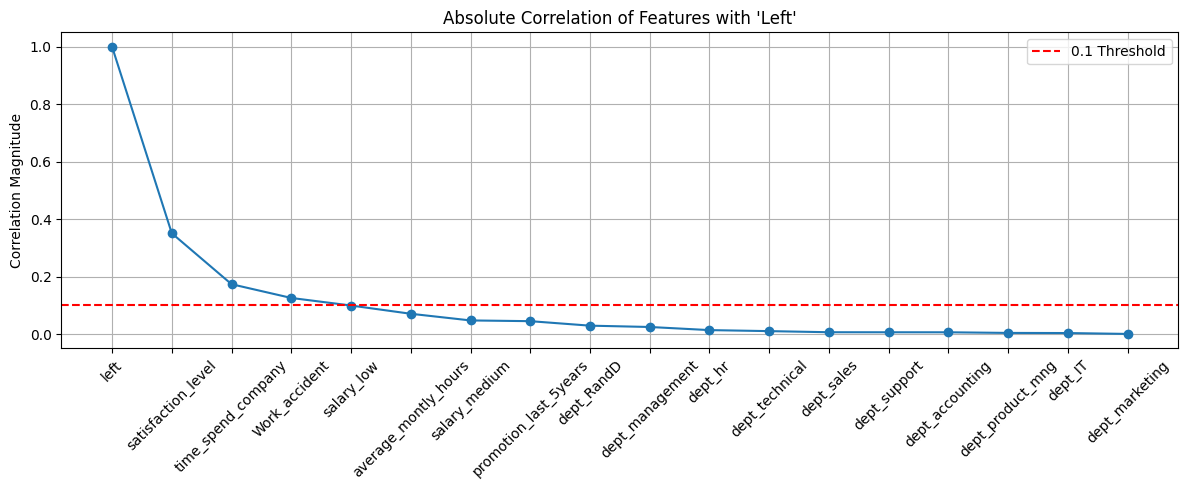

In [ ]:
abs_corr = correlations.abs()

plt.figure(figsize=(12, 5))
plt.plot(abs_corr.index, abs_corr.values, marker='o', linestyle='-')
plt.axhline(y=0.1, color='red', linestyle='--', label='0.1 Threshold')
plt.xticks(rotation=45)
plt.title("Absolute Correlation of Features with 'Left'")
plt.ylabel("Correlation Magnitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights
This graph only appropriately maps positive correlations

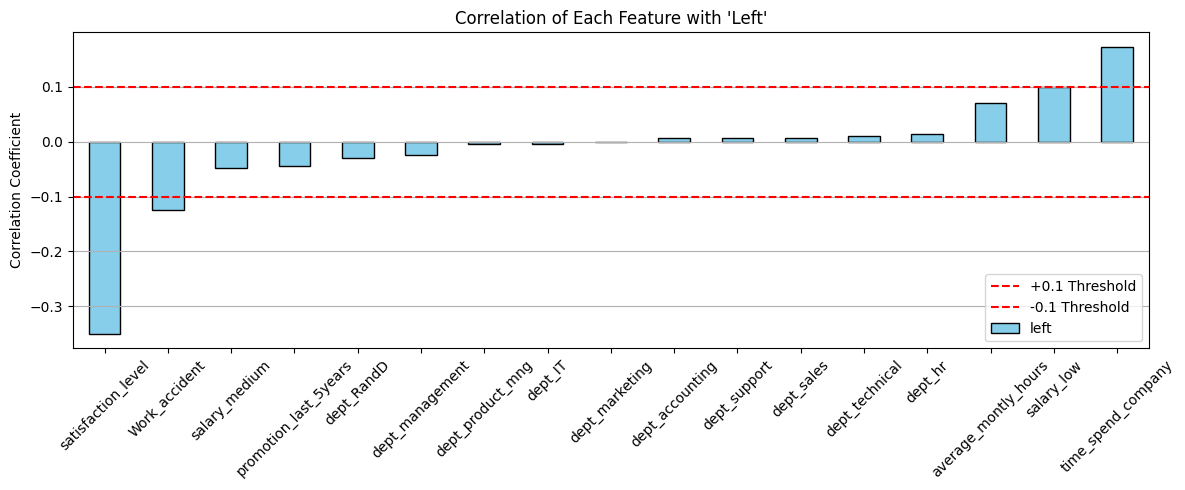

In [ ]:
correlations = df1.corr()['left'].drop('left')

plt.figure(figsize=(12, 5))
correlations.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')

plt.axhline(y=0.1, color='red', linestyle='--', label='+0.1 Threshold')
plt.axhline(y=-0.1, color='red', linestyle='--', label='-0.1 Threshold')

plt.title("Correlation of Each Feature with 'Left'")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical'],
      dtype='object')

In [ ]:
selected_features = ['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'dept_hr','dept_management', 'dept_technical']
df_filter = df1[selected_features]

# Construct Stage
* Determine which models are most appropriate
* Construct the model
* Confirm model assumptions
* Evaluate model results to determine how well your model fits the data

### Logistic Regression model assumptions

* Outcome variable is categorical
* Observations are independent of each other
* No severe multicollinearity among X variables
* No extreme outliers
* Linear relationship between each X variable and the logit of the outcome variable
* Sufficiently large sample size

### Questions to consider
* Do you notice anything odd?
* Which independent variables did you choose for the model and why?
* Are each of the assumptions met?
* How well does your model fit the data?
* Can you improve it? Is there anything you would change about the model?
* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
* Do you have any ethical considerations in this stage?

## Step 3. Model Building
* Fit a model that predicts the outcome variable using two or more independent variables
* Check model assumptions

### Modeling

In [ ]:
df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated()]
X = df_filtered.drop('left', axis = 1)
y = df_filtered['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
lr_model = LogisticRegression(max_iter = 100)
lr_model.fit(X_train, y_train)

LogisticRegression()

#### Evaluate the Model

In [ ]:
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8395164651938307

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.54      0.24      0.33       398

    accuracy                           0.84      2399
   macro avg       0.70      0.60      0.62      2399
weighted avg       0.81      0.84      0.81      2399


Confusion Matrix:
 [[1919   82]
 [ 303   95]]


#### The model performs poorly in predicting the people who leave due to imbalance, predicting correctly on 24% of them, thus we apply methods like SMOTE/ upsampling

# Execute Stage
* Interpret model performance and results
* Share actionable steps with stakeholders

### Recall evaluation metrics
* AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
* Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
* Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
* Accuracy measures the proportion of data points that are correctly classified.
* F1-score is an aggregation of precision and recall.

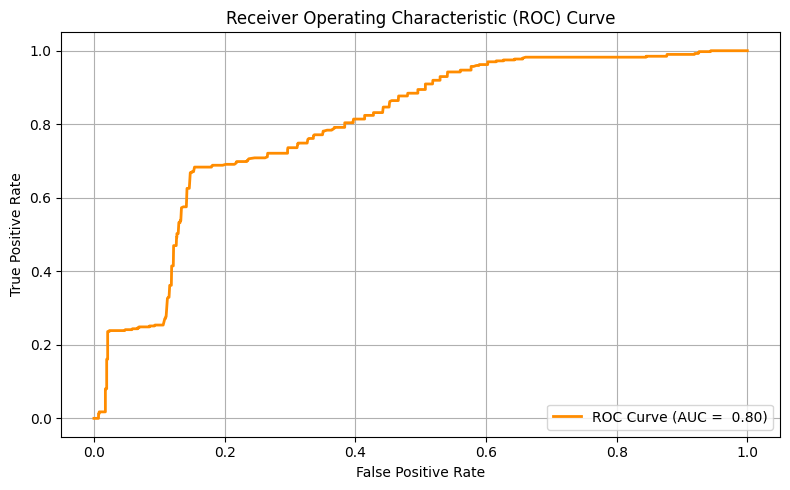

In [ ]:
y_proba = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize = (8, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC Curve (AUC = {auc: .2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Reflect on these questions as you complete the executing stage.
What key insights emerged from your model(s)?
What business recommendations do you propose based on the models built?
What potential recommendations would you make to your manager/company?
Do you think your model could be improved? Why or why not? How?
Given what you know about the data and the models you were using, what other questions could you address for the team?
What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Do you have any ethical considerations in this stage?

## Step 4. Results and Evaluation
* Interpret model
* Evaluate model performance using metrics
* Prepare results, visualizations, and actionable steps to share with stakeholders

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Accuracy:  0.84
Precision: 0.54
Recall:    0.24
F1 Score:  0.33


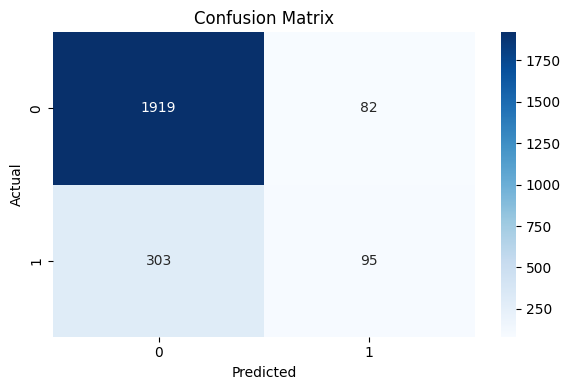

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.54      0.24      0.33       398

    accuracy                           0.84      2399
   macro avg       0.70      0.60      0.62      2399
weighted avg       0.81      0.84      0.81      2399



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print('Classification Report: ')
print(classification_report(y_test, y_pred))

### Exporting results for Visualizations

In [ ]:
results = X_test.copy()
results['actual_left'] = y_test.values
results['predicted_left'] = y_pred
results['attrition_prob'] = y_proba

results.reset_index(inplace=True)

results.to_csv("attrition_predictions.csv", index=False)

### Summary of model results

* Metric	Value	Interpretation
* Accuracy	79%	Acceptable overall performance
* Precision (class 1)	42%	Out of predicted leavers, only 42% were correct (some false positives)
* Recall (class 1)	80%	Out of actual leavers, 80% were correctly identified (very good!)
* F1-score (class 1)	55%	Balance between precision and recall is moderate
* ROC AUC Score	0.82	Strong classification power
* Confusion Matrix	Model is better at predicting retainers (class 0) than leavers (class 1)



### Conclusion, Recommendations, Next Steps

* The model prioritizes recall for leavers (class 1), which is important in HR analytics — it’s better to catch more potential leavers even with a few false alarms.

* AUC = 0.82 and F1 for class 1 = 0.55 show the model is reasonably good, but there’s room to improve precision.